# NanoHUB Remote Tools via RESTful API

### Acknowledgements: Ben Haley (HUBzero) and Sam Reeve (Purdue University) 

In [1]:
import sys, json, time
from urllib import urlencode
from urllib2 import urlopen, Request, HTTPError
import numpy as np
from matplotlib import pyplot as plt
%matplotlib notebook

In [2]:
class NanoHUBApiSettings:
    api_url = r'https://nanohub.org/api' # URL for the nanoHUB api
    tools_path = r'tools/list'
    oauth_path = r'developer/oauth/token'
    tools_status_path = r'tools/status'
    tools_result_path = r'tools/output'
    tools_run_path = r'tools/run'
    
    ### Other methods possible
    auth_data = {
        'client_id': '47c5487f881d94ca9158de88bfd40ad3', # Web app id created when registering your app
        'client_secret': '930ef2b6635e04b36a285269743375ca700eaf4b', # Web app secret created when registering your app
        'grant_type': 'password', # Static value
        'username': 'dcelbert', # nanoHUB user name here
        'password': 'CrHllva0F3yZ',# nanoHUB user password here
    }

    sleep_time = 1.5 # Time to wait for nanoHUB database updates
    
    headers = {} # This will be populated with Bearer token

### Step 2A. Look for a Tool

In [12]:
# Retrieve all tools (with short description and version)
print get_tools()

{u'tools': [{u'supported': 0, u'alias': u'1dchainmd', u'versions': [u'15'], u'description': u'1-D Chain of atoms, bases and layers to produce phonon dispersion', u'title': u'1-D Chain Dispersions'}, {u'supported': 0, u'alias': u'1dphononbte', u'versions': [u'9'], u'description': u'Simulate heat transport by solving one dimensional Boltzmann transport equation.', u'title': u'1-D Phonon BTE Solver'}, {u'supported': 0, u'alias': u'ddsolarcell', u'versions': [u'16'], u'description': u'Simulate a 1D solar cell of crystalline material with drift diffusion equations', u'title': u'1D Drift Diffusion Model for Crystalline Solar Cells'}, {u'supported': 0, u'alias': u'1dfdmht', u'versions': [u'28'], u'description': u'Simple 1D Finite Difference Method Tool for Undergraduate Heat Transfer Course', u'title': u'1D Finite Different Method Conduction Heat Transfer Tool'}, {u'supported': 0, u'alias': u'1dhetero', u'versions': [u'742'], u'description': u'Poisson-Schr\xf6dinger Solver for 1D Heterostruct

### Step 2B. Use a Tool
  1. Specify a tool name
  2. Specificy the payload to send to the tool (e.g. the path to a driver xml file)
  3. Run the tool with the "run_tool" function

In [13]:
# Pick a tool
tool_name = 'nanoplasticity' # Specify the tool short-name (from tool url)

# Here we specify the payload for the tool, in this example, I am reading from a file,
# Though, the payload can be specified as a string as well
### Assuming the example driver is in the current path
with open('nanoplasticity_driver_xml', 'r') as f: # Specify the payload for the tool
    driver_str = f.read()
xml_result = run_tool(tool_name, driver_str) # Return results

Started job (session 1195455)
Run finished

### Step 3. Analyze results
#### Quick and dirty parsing of the xml to get all curves

<IPython.core.display.Javascript object>


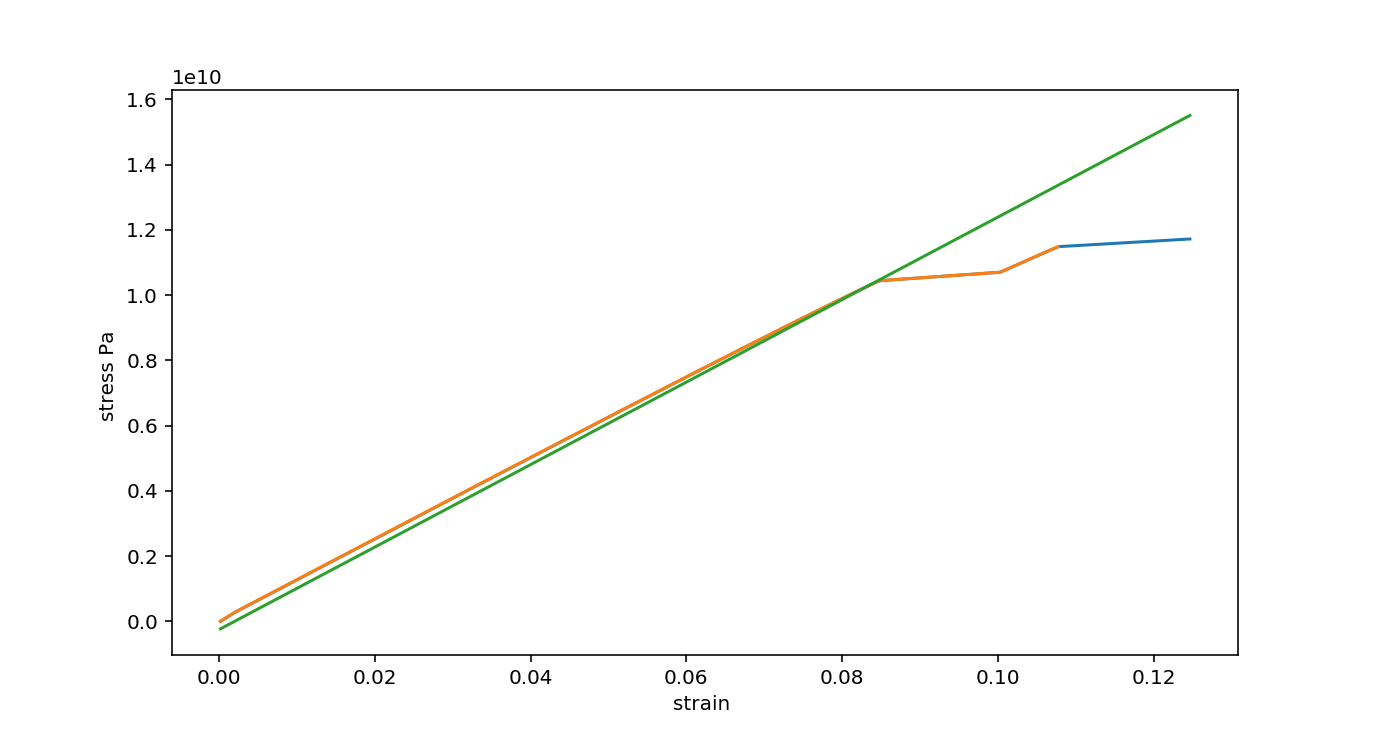


strain 
No units for xaxis

stress 


In [14]:
fig = plt.figure()
ax0 = fig.add_subplot(111)

### Find and plot all XY curves from output
### In this case all curves share the same XY variables (not always the case)
out = xml_result['output']

### All 2D curves use "xy" xml tag
outsplit = out.split('<xy>')
for sp, curvetxt in enumerate(outsplit[1:]):
    curve = curvetxt.split('</xy>')[0]
    with open('xy'+str(sp)+'.txt','w') as f:
        f.write(curve)
    npcurve = np.atleast_2d(np.loadtxt('xy'+str(sp)+'.txt'))
    ax0.plot(npcurve[:,0], npcurve[:,1])

### Find axis labels and units
name = ['']*2
for a, direction in enumerate(['xaxis','yaxis']):
    axis = out.split('<'+direction+'>')[1].split('</'+direction+'>')[0]
    for tag in ['label', 'units']:
        try:
            print name[a]
            name[a] += axis.split('<'+tag+'>')[1].split('</'+tag+'>')[0] + ' '
        except IndexError:
            print('No {} for {}'.format(tag, direction))
ax0.set_xlabel(name[0])
ax0.set_ylabel(name[1])
plt.show()

### number (single value), text, and other output available

## Possible issues:
1. Authentication errors
    1. You don't have a nanoHUB account (see above)
    2. You don't have a nanoHUB web app (see above)
2. Authentication works, but the run generates authorization error
    1. You already have the maximum (3) sessions running (check your nanoHUB homepage)